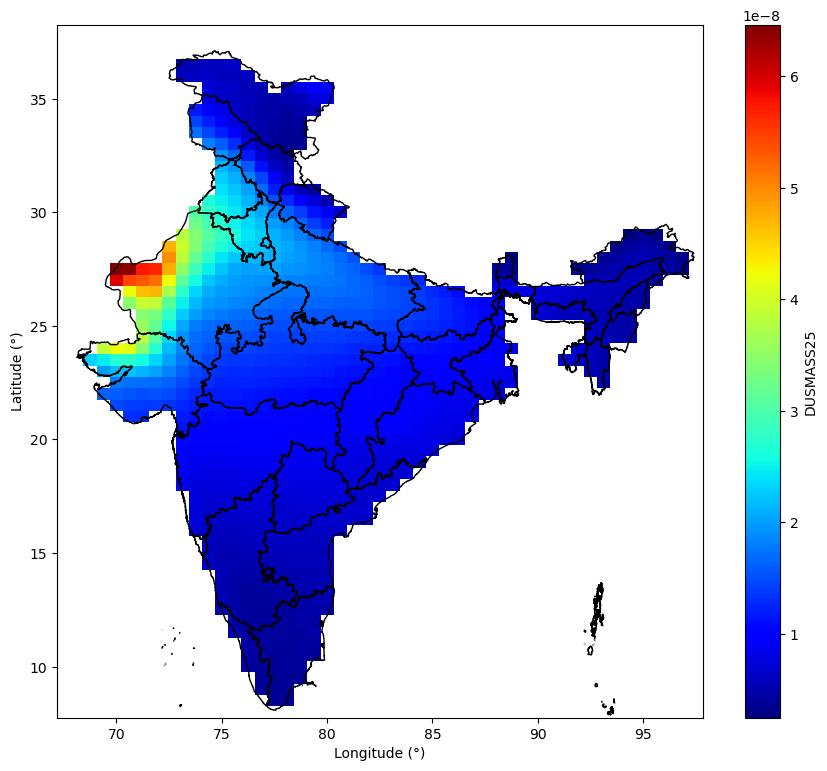

In [12]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 0 to 35
lon_range = slice(67, 98)  # Longitude range from 50 to 100

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range).mean(dim='time')

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the time mean data
plt.figure(figsize=(11, 9))
subset_data.plot(cmap='jet')

# Step 4: Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


Length of health_outcome: 5
Length of pm25_concentration: 2989
Length of truncated health_outcome: 5
Length of truncated pm25_concentration: 922


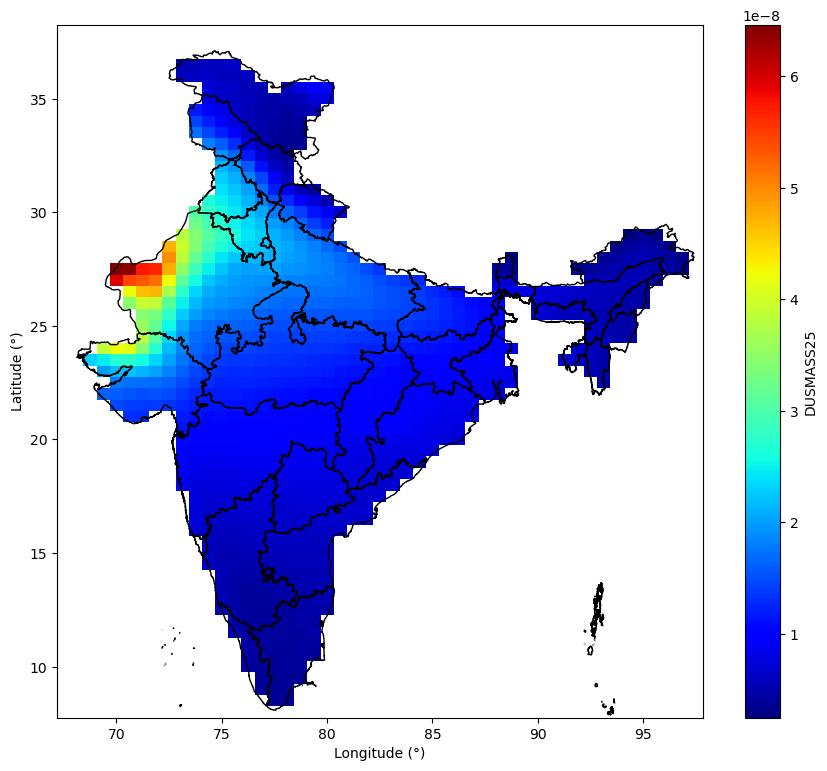

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS
import numpy as np
import statsmodels.api as sm

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range).mean(dim='time')

# Step 2: Extract PM2.5 concentration data
pm25_concentration = subset_data.values.flatten()

# Step 3: Prepare health outcome data (replace with your actual data)
# Assuming health outcome data corresponds to the same number of observations as pm25_concentration
health_outcome = np.array([1.1, 1.2, 1.4, 1.6, 1.8])  # Example health outcome data

# Print lengths of health_outcome and pm25_concentration arrays
print("Length of health_outcome:", len(health_outcome))
print("Length of pm25_concentration:", len(pm25_concentration))

# Step 4: Handle missing or infinite values in the PM2.5 concentration data
valid_indices = np.isfinite(pm25_concentration)
pm25_concentration = pm25_concentration[valid_indices]
health_outcome = health_outcome[:len(pm25_concentration)]  # Truncate health_outcome to match pm25_concentration

# Print lengths of truncated health_outcome and pm25_concentration arrays
print("Length of truncated health_outcome:", len(health_outcome))
print("Length of truncated pm25_concentration:", len(pm25_concentration))

# Continue with the rest of your code
# Manually specify the CRS based on your knowledge (if needed)
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Step 5: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 6: Plot the time mean data
plt.figure(figsize=(11, 9))
subset_data.plot(cmap='jet')

# Step 7: Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_6012\3055947169.py:42: RuntimeWarning: overflow encountered in exp
  relative_risks = np.exp(beta * subset_data.values)
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


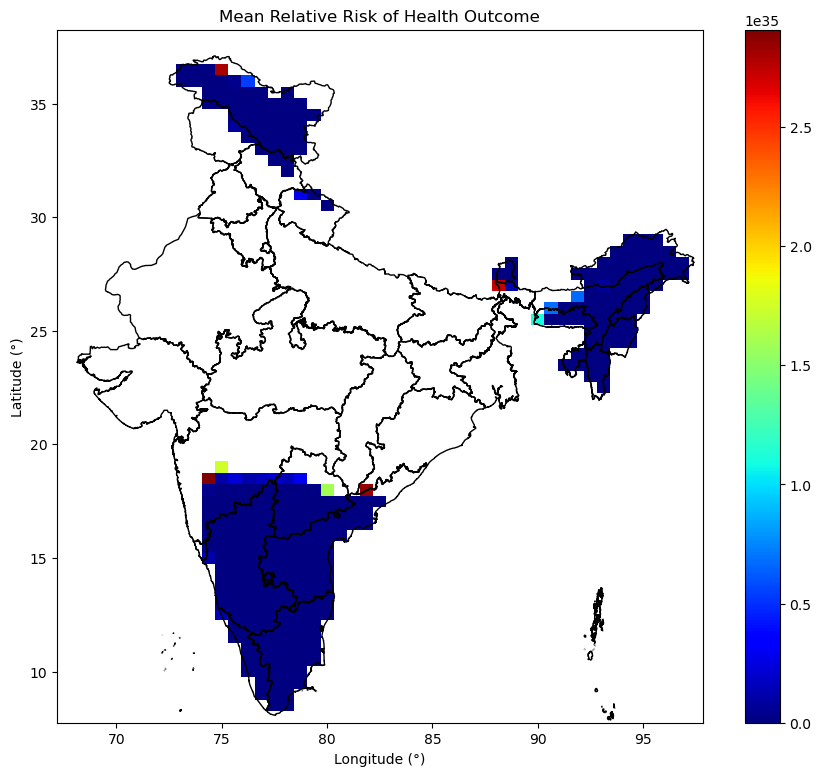

In [28]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS
import statsmodels.api as sm
import geopandas as gpd

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Step 2: Extract PM2.5 concentration data
pm25_concentration = subset_data.values.flatten()

# Handle missing or invalid values in pm25_concentration
valid_indices = np.isfinite(pm25_concentration)
pm25_concentration = pm25_concentration[valid_indices]

# Step 3: Prepare health outcome data (replace with your actual data)
# Assuming health outcome data corresponds to the same number of observations as pm25_concentration
health_outcome = np.array([1.1, 1.2, 1.4, 1.6, 1.8])  # Example health outcome data

# Check if the lengths of health_outcome and pm25_concentration match
if len(health_outcome) != len(pm25_concentration):
    min_length = min(len(health_outcome), len(pm25_concentration))
    health_outcome = health_outcome[:min_length]
    pm25_concentration = pm25_concentration[:min_length]

# Step 4: Fit a regression model to estimate the coefficient (β)
X = sm.add_constant(pm25_concentration)  # Add intercept to the predictor variable
model = sm.OLS(health_outcome, X)
results = model.fit()

# Get the coefficient (β)
beta = results.params[1]

# Step 5: Calculate relative risk (RR) for each time step
relative_risks = np.exp(beta * subset_data.values)

# Step 6: Take the mean of the relative risk values across time
mean_relative_risk = np.mean(relative_risks, axis=0)

# Step 7: Plot the mean relative risk values on a map
plt.figure(figsize=(11, 9))
mean_relative_risk_plot = xr.DataArray(mean_relative_risk, dims=('lat', 'lon'), coords={'lat': subset_data.lat, 'lon': subset_data.lon})
mean_relative_risk_plot.plot(cmap='jet')

# Manually specify the CRS based on your knowledge (if needed)
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
india_shape = india_shape.to_crs(nc_crs)

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('Mean Relative Risk of Health Outcome')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_6012\2883404423.py:42: RuntimeWarning: overflow encountered in exp
  relative_risks = np.exp(beta * subset_data.values)
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_6012\2883404423.py:45: RuntimeWarning: Mean of empty slice
  mean_relative_risk = np.nanmean(relative_risks, axis=0)


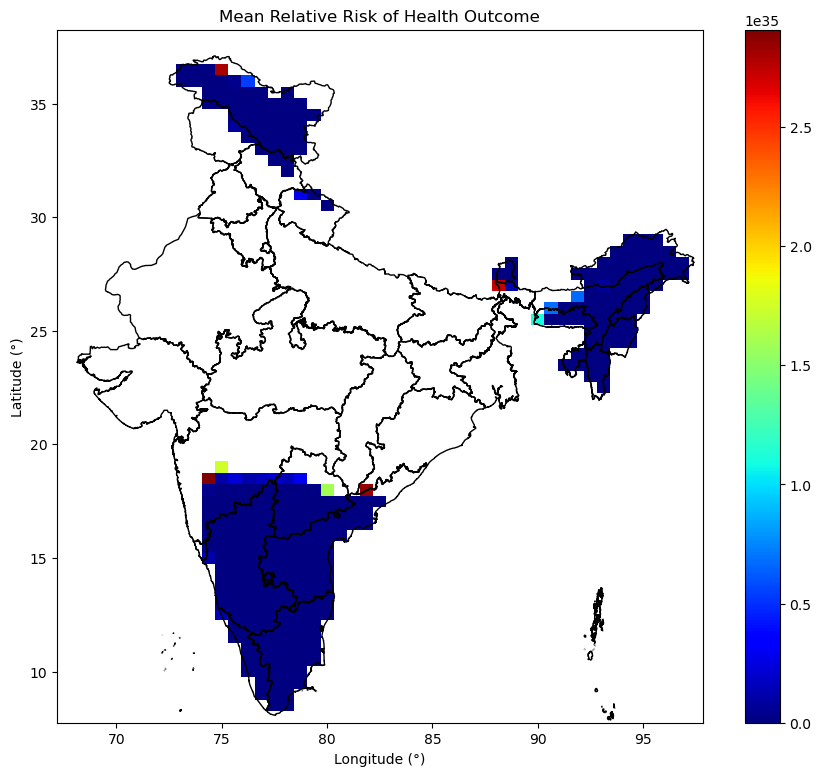

In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS
import statsmodels.api as sm
import geopandas as gpd

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Step 2: Extract PM2.5 concentration data
pm25_concentration = subset_data.values.flatten()

# Handle missing or invalid values in pm25_concentration
valid_indices = np.isfinite(pm25_concentration)
pm25_concentration = pm25_concentration[valid_indices]

# Step 3: Prepare health outcome data (replace with your actual data)
# Assuming health outcome data corresponds to the same number of observations as pm25_concentration
health_outcome = np.array([1.1, 1.2, 1.4, 1.6, 1.8])  # Example health outcome data

# Check if the lengths of health_outcome and pm25_concentration match
if len(health_outcome) != len(pm25_concentration):
    min_length = min(len(health_outcome), len(pm25_concentration))
    health_outcome = health_outcome[:min_length]
    pm25_concentration = pm25_concentration[:min_length]

# Step 4: Fit a regression model to estimate the coefficient (β)
X = sm.add_constant(pm25_concentration)  # Add intercept to the predictor variable
model = sm.OLS(health_outcome, X)
results = model.fit()

# Get the coefficient (β)
beta = results.params[1]

# Step 5: Calculate relative risk (RR) for each time step
relative_risks = np.exp(beta * subset_data.values)

# Step 6: Take the mean of the relative risk values across time considering nan values
mean_relative_risk = np.nanmean(relative_risks, axis=0)

# Step 7: Plot the mean relative risk values on a map
plt.figure(figsize=(11, 9))
mean_relative_risk_plot = xr.DataArray(mean_relative_risk, dims=('lat', 'lon'), coords={'lat': subset_data.lat, 'lon': subset_data.lon})
mean_relative_risk_plot.plot(cmap='jet')

# Manually specify the CRS based on your knowledge (if needed)
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = CRS.from_epsg(4326)

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
india_shape = india_shape.to_crs(nc_crs)

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add title and labels
plt.title('Mean Relative Risk of Health Outcome')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

# Show plot
plt.show()


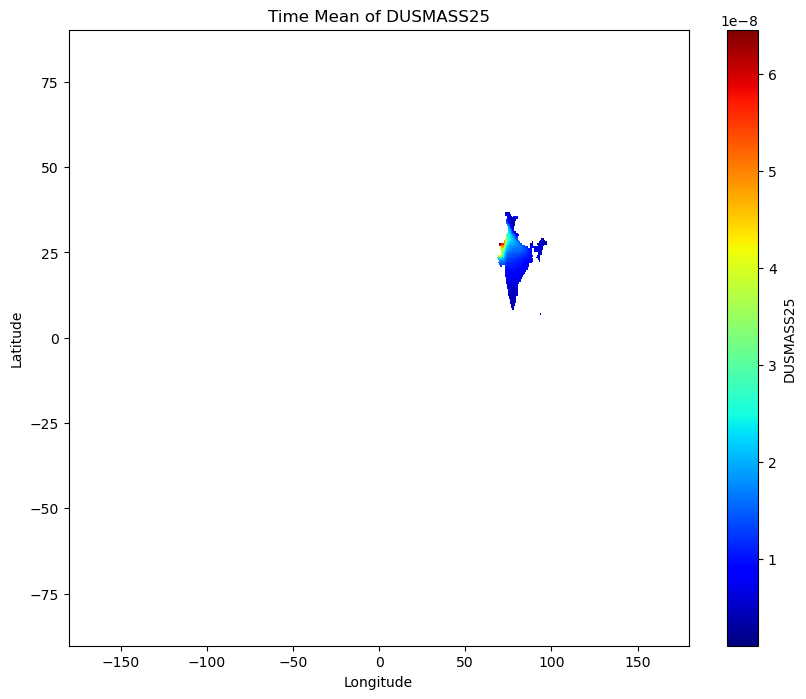

In [46]:
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')

# Step 2: Calculate the time-mean of DUSMASS25
time_mean_dusmass25 = nc_data['DUSMASS25'].mean(dim='time')

# Step 3: Plot the time-mean DUSMASS25
plt.figure(figsize=(10, 8))
time_mean_dusmass25.plot(cmap='jet')
plt.title('Time Mean of DUSMASS25')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


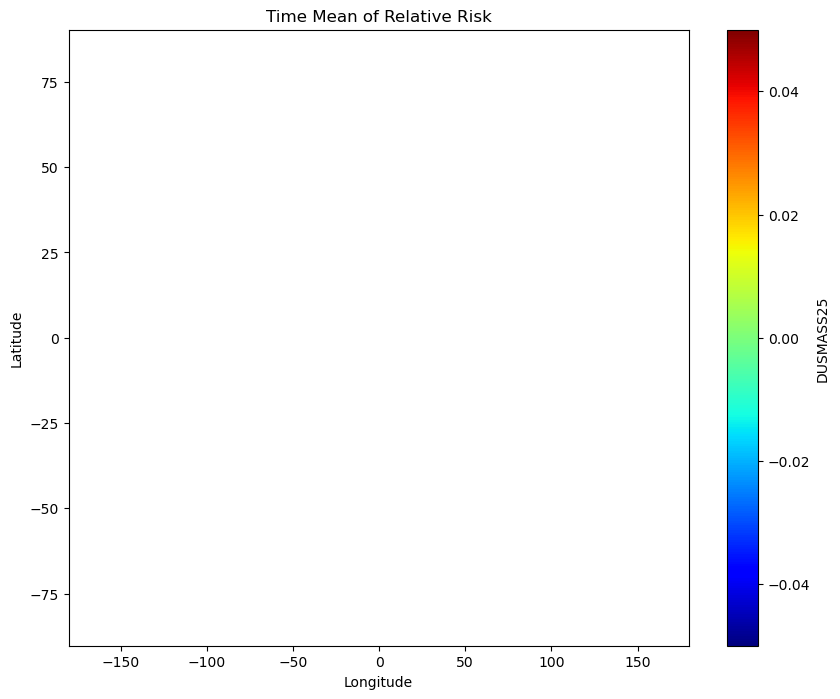

In [50]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')

# Step 2: Extract PM2.5 concentration data
pm25_concentration = nc_data['DUSMASS25']

# Step 3: Fit a regression model to estimate the coefficient (β)
X = pm25_concentration.values.flatten()
Y = np.random.randn(len(X))  # Generate random health outcome data for demonstration

# Calculate the coefficient using numpy
X_mean = np.mean(X)
Y_mean = np.mean(Y)
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean) ** 2)
beta = numerator / denominator

# Step 4: Calculate relative risk (RR)
relative_risks = np.exp(beta * pm25_concentration)

# Step 5: Take the mean of the relative risk values across time considering nan values
time_mean_relative_risk = relative_risks.mean(dim='time')

# Step 6: Plot the time-mean of the relative risks
plt.figure(figsize=(10, 8))
time_mean_relative_risk.plot(cmap='jet')
plt.title('Time Mean of Relative Risk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


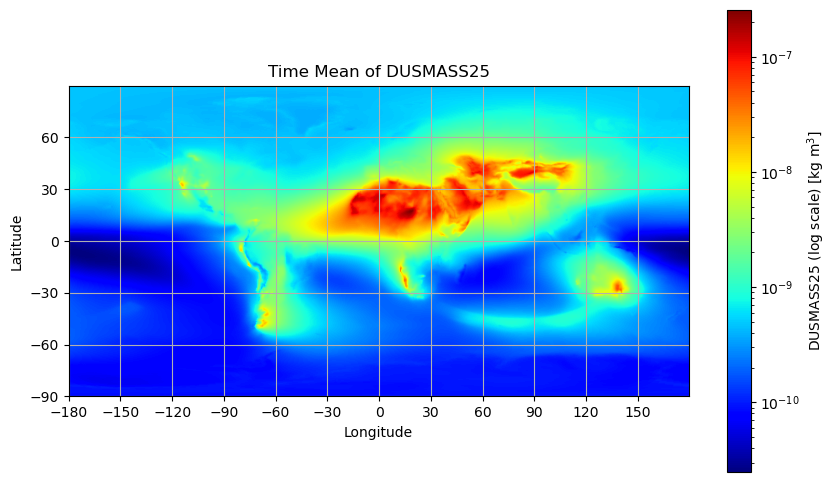

In [51]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Path to the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pollutants_BC_OC_DUST.nc'

# Open the NetCDF file
nc_file = nc.Dataset(file_path, 'r')

# Read the variable "DUSMASS25"
dust_mass = nc_file.variables['DUSMASS25'][:]

# Read latitude and longitude
latitude = nc_file.variables['lat'][:]
longitude = nc_file.variables['lon'][:]

# Calculate the time mean
dust_mass_mean = np.mean(dust_mass, axis=0)

# Close the NetCDF file
nc_file.close()

# Plotting
plt.figure(figsize=(10, 6))
im = plt.imshow(dust_mass_mean, cmap='jet', norm=LogNorm(), origin='lower', extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()])
cbar = plt.colorbar(im, label='DUSMASS25 (log scale) [kg m$^{3}$]')  # Add color bar label with unit
plt.title('Time Mean of DUSMASS25')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Custom ticks for latitude and longitude
plt.xticks(np.arange(longitude.min(), longitude.max(), 30))
plt.yticks(np.arange(latitude.min(), latitude.max(), 30))

plt.grid(True)
plt.show()


TypeError: Invalid shape (529, 361, 576) for image data

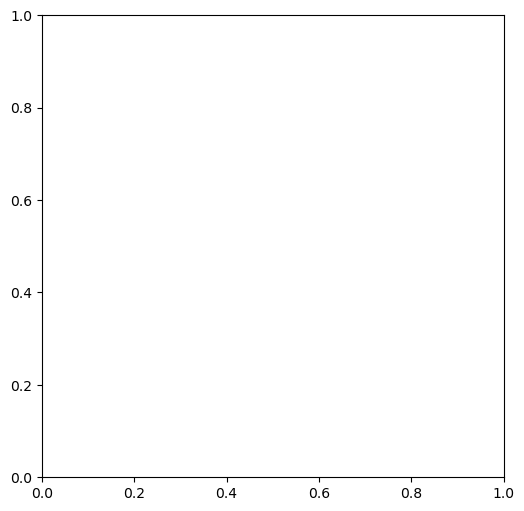

In [52]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pollutants_BC_OC_DUST.nc'
nc_file = nc.Dataset(file_path, 'r')

# Read the variable "DUSMASS25"
dust_mass = nc_file.variables['DUSMASS25'][:]

# Read latitude and longitude
latitude = nc_file.variables['lat'][:]
longitude = nc_file.variables['lon'][:]

# Close the NetCDF file
nc_file.close()

# Define the coefficient beta
beta = 0.1  # Example value

# Calculate the relative risk for the entire dataset
relative_risk = np.exp(beta * dust_mass)

# Plotting
plt.figure(figsize=(10, 6))
im = plt.imshow(relative_risk, cmap='jet', norm=LogNorm(), origin='lower', extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()])
cbar = plt.colorbar(im, label='Relative Risk (log scale)')  # Add color bar label
plt.title('Relative Risk of PM2.5 Exposure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Custom ticks for latitude and longitude
plt.xticks(np.arange(longitude.min(), longitude.max(), 30))
plt.yticks(np.arange(latitude.min(), latitude.max(), 30))

plt.grid(True)
plt.show()
